In [1]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
from silvhua import *
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
relevant_columns = [
    'REF_DATE',
    'Measures',
    'Sex',
    'Age group',
    'Statistics',
    'Characteristics',
    'VALUE',
]

## Exploration

In [3]:
df = load_csv('canadafitness.csv', 
    filepath='./Canada Physical fitness measures of the household population',
    usecols=relevant_columns)
df.head()

Dataframe shape:  (14112, 7)


,REF_DATE,Measures,Sex,Age group,Statistics,Characteristics,VALUE
0,2009,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,Mean,Estimate,NaN
1,2009,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,Mean,"Low 95% confidence interval, estimate",NaN
2,2009,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,Mean,"High 95% confidence interval, estimate",NaN
3,2009,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,5th Percentile,Estimate,NaN
4,2009,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,5th Percentile,"Low 95% confidence interval, estimate",NaN


In [6]:
print(df.shape)
for column in df.columns[0:-1]:
    print(df[column].value_counts())

(14112, 7)
2009    2880
2011    2880
2013    2880
2015    2880
2017    1296
2019    1296
Name: REF_DATE, dtype: int64
Predicted maximal oxygen consumption    3744
Sit and reach                           3744
Total grip strength                     3744
Partial curl-ups                        2880
Name: Measures, dtype: int64
Both sexes    4704
Males         4704
Females       4704
Name: Sex, dtype: int64
Ages 12 to 19    1584
Ages 20 to 39    1584
Ages 40 to 59    1584
Ages 6 to 11     1440
Ages 60 to 69    1440
Ages 6 to 79     1296
Ages 6 to 69     1296
Ages 8 to 69     1296
Ages 8 to 11     1296
Ages 60 to 79    1296
Name: Age group, dtype: int64
Mean               1764
5th Percentile     1764
10th Percentile    1764
25th Percentile    1764
50th Percentile    1764
75th Percentile    1764
90th Percentile    1764
95th Percentile    1764
Name: Statistics, dtype: int64
Estimate                                  4704
Low 95% confidence interval, estimate     4704
High 95% confidence inter

In [5]:
# Drop these:
    # Rows with missing values
    # values that are confidence interval boundaries, then drop that column
    # sit ups
    # rows with data for both sexes
df = df.dropna(subset = 'VALUE')
rows_to_drop = (df['Measures'] == 'Partial curl-ups') | (df['Characteristics'] != 'Estimate' ) | (df['Statistics'] == 'Mean') | (df['Sex'] == 'Both sexes')
df[rows_to_drop].index
df = df.drop(df[rows_to_drop].index)
df = df.drop(columns='Characteristics')
print(df.shape)
df

(1187, 6)


,REF_DATE,Measures,Sex,Age group,Statistics,VALUE
267,2009,Predicted maximal oxygen consumption,Males,Ages 6 to 69,5th Percentile,27.1
270,2009,Predicted maximal oxygen consumption,Males,Ages 6 to 69,10th Percentile,29.9
273,2009,Predicted maximal oxygen consumption,Males,Ages 6 to 69,25th Percentile,35.0
276,2009,Predicted maximal oxygen consumption,Males,Ages 6 to 69,50th Percentile,42.0
279,2009,Predicted maximal oxygen consumption,Males,Ages 6 to 69,75th Percentile,50.1
...,...,...,...,...,...,...
14097,2019,Total grip strength,Females,Ages 60 to 79,25th Percentile,40.0
14100,2019,Total grip strength,Females,Ages 60 to 79,50th Percentile,47.0
14103,2019,Total grip strength,Females,Ages 60 to 79,75th Percentile,53.0
14106,2019,Total grip strength,Females,Ages 60 to 79,90th Percentile,58.0


In [8]:
for column in df.columns[0:-1]:
    print(df[column].value_counts(),'\n')

2009    276
2011    249
2017    247
2019    247
2013     84
2015     84
Name: REF_DATE, dtype: int64 

Total grip strength                     504
Predicted maximal oxygen consumption    349
Sit and reach                           334
Name: Measures, dtype: int64 

Females    596
Males      591
Name: Sex, dtype: int64 

Ages 12 to 19    196
Ages 20 to 39    195
Ages 40 to 59    195
Ages 6 to 11     154
Ages 60 to 69     98
Ages 6 to 79      84
Ages 60 to 79     84
Ages 6 to 69      70
Ages 8 to 69      56
Ages 8 to 11      55
Name: Age group, dtype: int64 

25th Percentile    172
50th Percentile    172
75th Percentile    172
90th Percentile    172
10th Percentile    171
5th Percentile     164
95th Percentile    164
Name: Statistics, dtype: int64 



In [9]:
# Investigate why there are so many age groups that overlap
    # Check by measurement
for measure in df['Measures'].unique():
    print(measure,'\n')
    print(df['Age group'].value_counts(sort=True),'\n')

Predicted maximal oxygen consumption 

Ages 12 to 19    196
Ages 20 to 39    195
Ages 40 to 59    195
Ages 6 to 11     154
Ages 60 to 69     98
Ages 6 to 79      84
Ages 60 to 79     84
Ages 6 to 69      70
Ages 8 to 69      56
Ages 8 to 11      55
Name: Age group, dtype: int64 

Sit and reach 

Ages 12 to 19    196
Ages 20 to 39    195
Ages 40 to 59    195
Ages 6 to 11     154
Ages 60 to 69     98
Ages 6 to 79      84
Ages 60 to 79     84
Ages 6 to 69      70
Ages 8 to 69      56
Ages 8 to 11      55
Name: Age group, dtype: int64 

Total grip strength 

Ages 12 to 19    196
Ages 20 to 39    195
Ages 40 to 59    195
Ages 6 to 11     154
Ages 60 to 69     98
Ages 6 to 79      84
Ages 60 to 79     84
Ages 6 to 69      70
Ages 8 to 69      56
Ages 8 to 11      55
Name: Age group, dtype: int64 



In [10]:
# Investigate why there are so many age groups that overlap
    # Check by year
for year in df['REF_DATE'].unique():
    print(year,'\n')
    print(df['Age group'].value_counts(sort=True),'\n')

2009 

Ages 12 to 19    196
Ages 20 to 39    195
Ages 40 to 59    195
Ages 6 to 11     154
Ages 60 to 69     98
Ages 6 to 79      84
Ages 60 to 79     84
Ages 6 to 69      70
Ages 8 to 69      56
Ages 8 to 11      55
Name: Age group, dtype: int64 

2011 

Ages 12 to 19    196
Ages 20 to 39    195
Ages 40 to 59    195
Ages 6 to 11     154
Ages 60 to 69     98
Ages 6 to 79      84
Ages 60 to 79     84
Ages 6 to 69      70
Ages 8 to 69      56
Ages 8 to 11      55
Name: Age group, dtype: int64 

2013 

Ages 12 to 19    196
Ages 20 to 39    195
Ages 40 to 59    195
Ages 6 to 11     154
Ages 60 to 69     98
Ages 6 to 79      84
Ages 60 to 79     84
Ages 6 to 69      70
Ages 8 to 69      56
Ages 8 to 11      55
Name: Age group, dtype: int64 

2015 

Ages 12 to 19    196
Ages 20 to 39    195
Ages 40 to 59    195
Ages 6 to 11     154
Ages 60 to 69     98
Ages 6 to 79      84
Ages 60 to 79     84
Ages 6 to 69      70
Ages 8 to 69      56
Ages 8 to 11      55
Name: Age group, dtype: int64 

2017

In [11]:
# VO2max only
groupby = [
    'REF_DATE',
    # 'Measures',
    'Age group',
]
measure = 'Predicted maximal oxygen consumption'
filter = df['Measures'] == measure
df[filter].groupby(groupby).agg({'VALUE': 'count'}).sort_values(by=groupby+['Age group']).head(50)
# Age groups for 12+ are constant

VALUE
REF_DATE Age group           
2009     Ages 12 to 19     14
         Ages 20 to 39     14
         Ages 40 to 59     14
         Ages 6 to 11      14
         Ages 6 to 69      14
         Ages 60 to 69     10
         Ages 8 to 11      14
         Ages 8 to 69      14
2011     Ages 12 to 19     14
         Ages 20 to 39     14
         Ages 40 to 59     14
         Ages 60 to 69     12
         Ages 8 to 11      14
         Ages 8 to 69      14
2017     Ages 12 to 19     14
         Ages 20 to 39     14
         Ages 40 to 59     14
         Ages 60 to 69     10
         Ages 8 to 11      14
         Ages 8 to 69      14
2019     Ages 12 to 19     14
         Ages 20 to 39     14
         Ages 40 to 59     14
         Ages 60 to 69     10
         Ages 8 to 11      13
         Ages 8 to 69      14

In [12]:
# grip strength only
groupby = [
    'REF_DATE',
    # 'Measures',
    'Age group',
]
measure = 'Total grip strength'
filter = df['Measures'] == measure
df[filter].groupby(groupby).agg({'VALUE': 'count'}).sort_values(by=groupby+['Age group']).head(50)
# Age groups for 12+ are constant, but upper boundary is different than for vo2max

VALUE
REF_DATE Age group           
2009     Ages 12 to 19     14
         Ages 20 to 39     14
         Ages 40 to 59     14
         Ages 6 to 11      14
         Ages 6 to 79      14
         Ages 60 to 79     14
2011     Ages 12 to 19     14
         Ages 20 to 39     14
         Ages 40 to 59     14
         Ages 6 to 11      14
         Ages 6 to 79      14
         Ages 60 to 79     14
2013     Ages 12 to 19     14
         Ages 20 to 39     14
         Ages 40 to 59     14
         Ages 6 to 11      14
         Ages 6 to 79      14
         Ages 60 to 79     14
2015     Ages 12 to 19     14
         Ages 20 to 39     14
         Ages 40 to 59     14
         Ages 6 to 11      14
         Ages 6 to 79      14
         Ages 60 to 79     14
2017     Ages 12 to 19     14
         Ages 20 to 39     14
         Ages 40 to 59     14
         Ages 6 to 11      14
         Ages 6 to 79      14
         Ages 60 to 79     14
2019     Ages 12 to 19     14
         Ages 20 to 39     14
         Ages 40 to 59     14
         Ages 6 to 11      14
         Ages 6 to 79      14
         Ages 60 to 79     14

# Data prep

In [4]:
df = load_csv('canadafitness.csv', 
    filepath='./Canada Physical fitness measures of the household population',
    usecols=relevant_columns)
df.head()

Dataframe shape:  (14112, 7)


,REF_DATE,Measures,Sex,Age group,Statistics,Characteristics,VALUE
0,2009,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,Mean,Estimate,NaN
1,2009,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,Mean,"Low 95% confidence interval, estimate",NaN
2,2009,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,Mean,"High 95% confidence interval, estimate",NaN
3,2009,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,5th Percentile,Estimate,NaN
4,2009,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,5th Percentile,"Low 95% confidence interval, estimate",NaN


In [14]:
# Missing values for vo2 max in 2013 and 2015
df[((df['REF_DATE'] ==2013) | (df['REF_DATE'] ==2015)) & (df['Measures'] == 'Predicted maximal oxygen consumption')].sort_values('VALUE', ascending=False)

,REF_DATE,Measures,Sex,Age group,Statistics,Characteristics,VALUE
5760,2013,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,Mean,Estimate,NaN
5761,2013,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,Mean,"Low 95% confidence interval, estimate",NaN
5762,2013,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,Mean,"High 95% confidence interval, estimate",NaN
5763,2013,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,5th Percentile,Estimate,NaN
5764,2013,Predicted maximal oxygen consumption,Both sexes,Ages 6 to 79,5th Percentile,"Low 95% confidence interval, estimate",NaN
...,...,...,...,...,...,...,...
9355,2015,Predicted maximal oxygen consumption,Females,Ages 60 to 79,90th Percentile,"Low 95% confidence interval, estimate",NaN
9356,2015,Predicted maximal oxygen consumption,Females,Ages 60 to 79,90th Percentile,"High 95% confidence interval, estimate",NaN
9357,2015,Predicted maximal oxygen consumption,Females,Ages 60 to 79,95th Percentile,Estimate,NaN
9358,2015,Predicted maximal oxygen consumption,Females,Ages 60 to 79,95th Percentile,"Low 95% confidence interval, estimate",NaN


In [7]:
# Drop these:
    # Rows with missing values
    # values that are confidence interval boundaries, then drop that column
    # sit and reach
    # rows with data for both sexes

def data_prep(df):
    print('original shape: ',df.shape)
    df = df.dropna(subset = 'VALUE')
    rows_to_drop = (df['Measures'] == 'Partial curl-ups') | (
        df['Characteristics'] != 'Estimate' ) | (df['Statistics'] == 'Mean') | (
            df['Sex'] == 'Both sexes') | (df['Age group']=='Ages 6 to 79') | (
                df['Age group']=='Ages 8 to 79') | (df['Age group']=='Ages 6 to 69') | (
                    df['Age group']=='Ages 8 to 69')
    df[rows_to_drop].index
    df = df.drop(df[rows_to_drop].index)
    
    # Convert age group to integer of the lower age boundary
    df['Age'] = df['Age group'].str.replace('Ages (\d*).*','\\1', regex=True).astype(int)

    # Convert percentiles to integers
    df['percentile'] = df['Statistics'].str.replace('(\d*).+','\\1', regex=True).astype(int)

    columns_to_drop = [
        'Characteristics',
        'Age group',
        'Statistics',
    ]
    df = df.drop(columns=columns_to_drop)
    # Make column names lower case
    df.columns = df.columns.str.lower()

    # rename ref_date to year
    df.columns = df.columns.str.replace('ref_date', 'year')

    # Create column with value from first time point
    t0_df = df[(df['year'] == df['year'].min())]
    groupby = ['measures', 'sex', 'age', 'percentile']
    # for year in df['ref_date'].unique():

    # # Merge age 6 and age 8 into the same age, age 8.
    # age6 = df['age']==6
    # df.loc[df[age6].index,['age']] = 8
    # df = df.drop(df[age6].index)
    
    print('shape before merge: ',df.shape)
    df = df.merge(t0_df, how='left', 
        on=groupby,
        suffixes = ['', '_t0'],
        # indicator = True
    )
        # If value from first time point is missing, fill it in with value from same year
    df['year_t0'].fillna(df['year'], inplace=True)
    df['value_t0'].fillna(df['value'], inplace=True)

    # Calculate change from t0
    df['delta_value'] = df['value'] - df['value_t0']
    
    # Make column names title case
    df.columns = df.columns.str.title()
    print('final shape: ',df.shape)
    return df

df2 = data_prep(df)
df2

original shape:  (14112, 7)
shape before merge:  (977, 6)
final shape:  (977, 9)


,Year,Measures,Sex,Value,Age,Percentile,Year_T0,Value_T0,Delta_Value
0,2009,Predicted maximal oxygen consumption,Males,49.6,6,5,2009.0,49.6,0.0
1,2009,Predicted maximal oxygen consumption,Males,50.8,6,10,2009.0,50.8,0.0
2,2009,Predicted maximal oxygen consumption,Males,54.7,6,25,2009.0,54.7,0.0
3,2009,Predicted maximal oxygen consumption,Males,57.1,6,50,2009.0,57.1,0.0
4,2009,Predicted maximal oxygen consumption,Males,59.1,6,75,2009.0,59.1,0.0
...,...,...,...,...,...,...,...,...,...
972,2019,Total grip strength,Females,40.0,60,25,2009.0,38.0,2.0
973,2019,Total grip strength,Females,47.0,60,50,2009.0,45.0,2.0
974,2019,Total grip strength,Females,53.0,60,75,2009.0,52.0,1.0
975,2019,Total grip strength,Females,58.0,60,90,2009.0,59.0,-1.0


In [ ]:
# df2['_merge'].value_counts()

both          975
left_only       2
right_only      0
Name: _merge, dtype: int64

In [ ]:
# No vo2 max for 6 year olds
df2[(df2['year'] !=2009) & (df2['measures'] == 'Predicted maximal oxygen consumption') & (df2['age']==6)].head(40)

,year,measures,sex,value,age,percentile,year_t0,value_t0,delta_value


In [ ]:

df2[df2['year']==2009].sort_values('delta_value',ascending=False).head(5)

,year,measures,sex,value,age,percentile,year_t0,value_t0,delta_value
0,2009,Predicted maximal oxygen consumption,Males,49.6,6,5,2009.0,49.6,0.0
151,2009,Total grip strength,Males,15.0,6,10,2009.0,15.0,0.0
140,2009,Sit and reach,Females,35.2,40,75,2009.0,35.2,0.0
141,2009,Sit and reach,Females,39.5,40,90,2009.0,39.5,0.0
142,2009,Sit and reach,Females,42.6,40,95,2009.0,42.6,0.0


## EDA

### Max oxygen consumption (cardiorespiratory fitness)

In [9]:
measure = 'Predicted maximal oxygen consumption'
crf = df2['Measures'] == measure
df_crf = df2[crf]
df_crf

,Year,Measures,Sex,Value,Age,Percentile,Year_T0,Value_T0,Delta_Value
0,2009,Predicted maximal oxygen consumption,Males,49.6,6,5,2009.0,49.6,0.0
1,2009,Predicted maximal oxygen consumption,Males,50.8,6,10,2009.0,50.8,0.0
2,2009,Predicted maximal oxygen consumption,Males,54.7,6,25,2009.0,54.7,0.0
3,2009,Predicted maximal oxygen consumption,Males,57.1,6,50,2009.0,57.1,0.0
4,2009,Predicted maximal oxygen consumption,Males,59.1,6,75,2009.0,59.1,0.0
...,...,...,...,...,...,...,...,...,...
832,2019,Predicted maximal oxygen consumption,Females,18.4,60,10,2009.0,19.5,-1.1
833,2019,Predicted maximal oxygen consumption,Females,20.5,60,25,2009.0,21.4,-0.9
834,2019,Predicted maximal oxygen consumption,Females,24.2,60,50,2009.0,23.1,1.1
835,2019,Predicted maximal oxygen consumption,Females,28.4,60,75,2009.0,27.6,0.8


<AxesSubplot: xlabel='year', ylabel='value'>

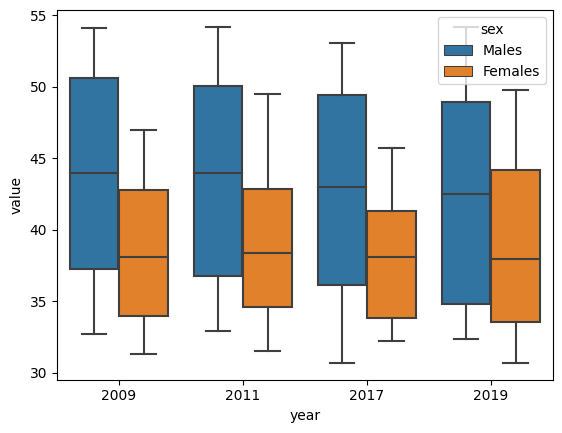

In [ ]:
# filter = df_crf['age'] == 20
# sns.boxplot(data=df_crf[filter], y='value', hue='sex', x='year')

#### Lineplots function

In [85]:
# Create function to plot 2022-11-15 19:15
def lineplots(df, y='Value', x='Year', column='Sex', row='Age', hue='Percentile',
    show_legend=True, yaxis_label=None, xticks=None, title=None):

    subplot_label = 'abcdefghijklmnopq'
    column_values = sorted(df[column].unique())
    row_values = sorted(df[row].unique())
    nrows = len(row_values)
    ncols = max([len(column_values),2])
    title_variable = df[row].name
    fig, ax = plt.subplots(nrows=nrows ,ncols=ncols, figsize=(10,nrows*3))
    fig.suptitle(title, fontsize=20)
    ymin = df[y].min()
    ymax = df[y].max()
    ax = ax.flatten()
    # colors = sns.color_palette("rocket", as_cmap = True)
    # colors = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap = True)
    colors = sns.color_palette("coolwarm", n_colors=len(df[hue].unique()))

    ax_index = 0
    for row_number in range(nrows):
        for col_number in range(len(column_values)):
            # print(ax_index)
            if (show_legend==True) & (col_number==0):
                legend = 'full'
            else:
                legend = False
            filter = (df[row] == row_values[row_number]) & (df[column] == column_values[col_number])

            sns.lineplot(data=df[filter], y=y, 
                hue=hue, x=x, marker='o', alpha=0.8,
                legend=legend, palette=colors,
                    ax = ax[ax_index])
            if nrows > 1:
                ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {row_values[row_number]}, {column_values[col_number]}', fontsize=12, loc='left')
            else:
                ax[ax_index].set_title(f'{subplot_label[ax_index]}) {column_values[col_number]}', fontsize=12, loc='left')
            ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
            if yaxis_label:
                ax[ax_index].set_ylabel(yaxis_label)
            if xticks:
                ax[ax_index].xaxis.set_ticks(xticks)
            if (legend == 'full'):
                # Reverse order of legend entries, then position the legend
                handles, labels = ax[ax_index].get_legend_handles_labels()
                ax[ax_index].legend(handles[::-1], labels[::-1])
                sns.move_legend(ax[ax_index],'center left',bbox_to_anchor=(1, 0.5), title=hue)

            ax_index += 1
        
    plt.tight_layout()
    return fig

In [12]:
xticks = [year for year in range(2009,2021, 2)]
xticks

[2009, 2011, 2013, 2015, 2017, 2019]

C:\Users\silvh\AppData\Local\Temp\ipykernel_4440\2350172412.py:30: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.lineplot(data=df[filter], y=y,


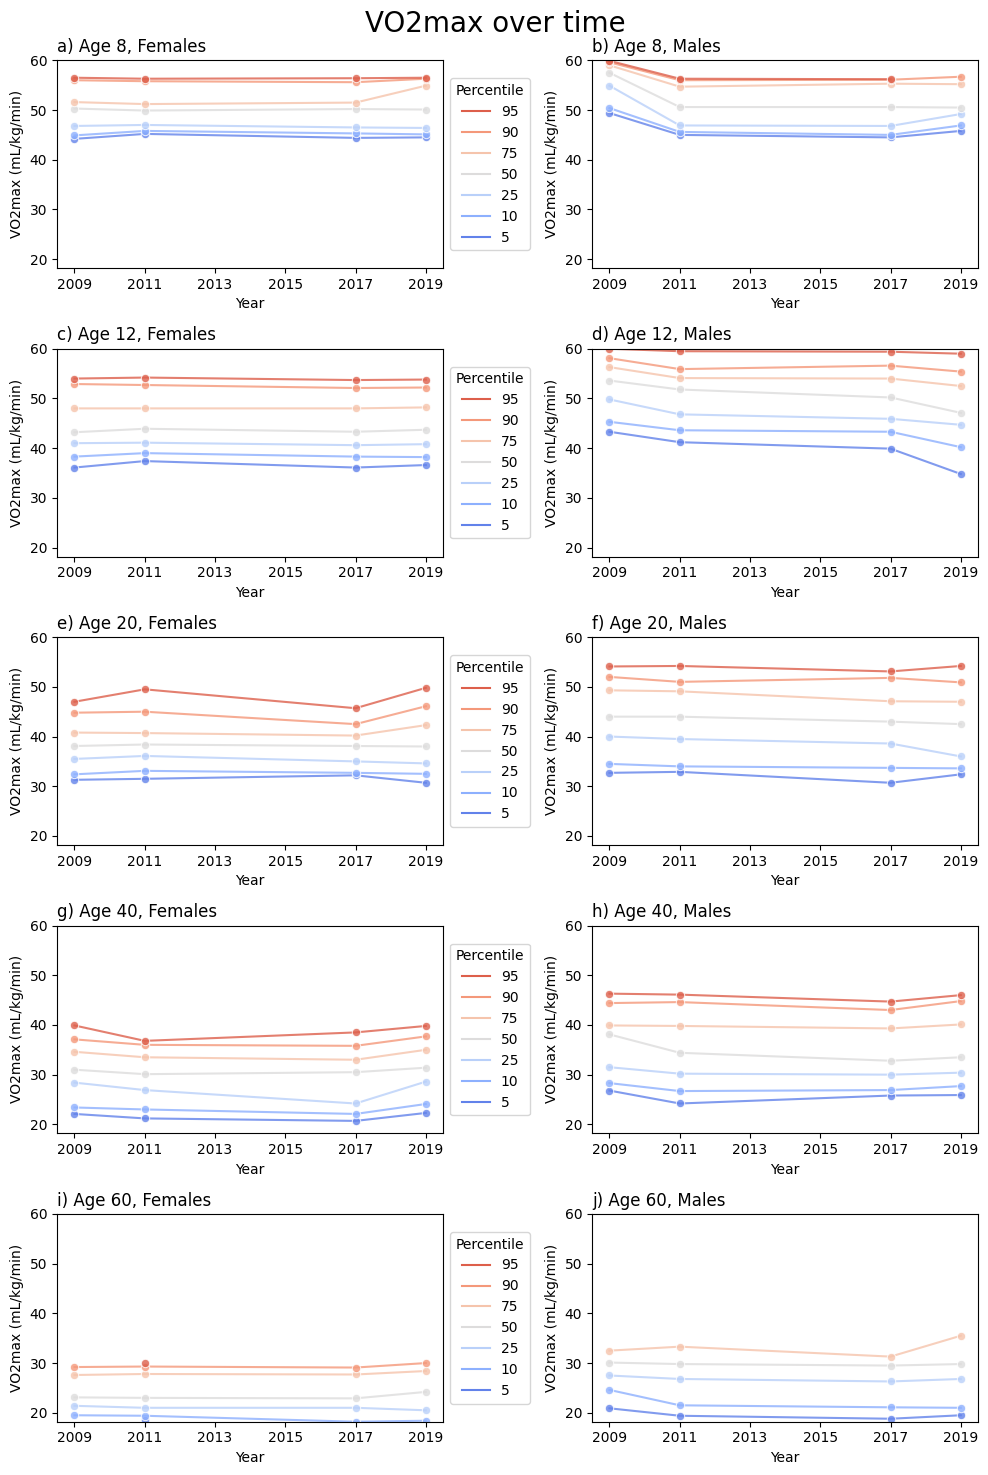

In [86]:
plot_abs_crf_age = lineplots(df_crf[df_crf['Age'] > 6], yaxis_label='VO2max (mL/kg/min)',
    xticks=xticks, title='VO2max over time')
# Each line represents a percentile value
    # The fittest seniors are getting fitter over time
    # People under age 20 with median or with below average fitness are getting less fit over time

plot_abs_crf_age.savefig(r'./crf vs year by age.png')

C:\Users\silvh\AppData\Local\Temp\ipykernel_4440\2350172412.py:30: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.lineplot(data=df[filter], y=y,


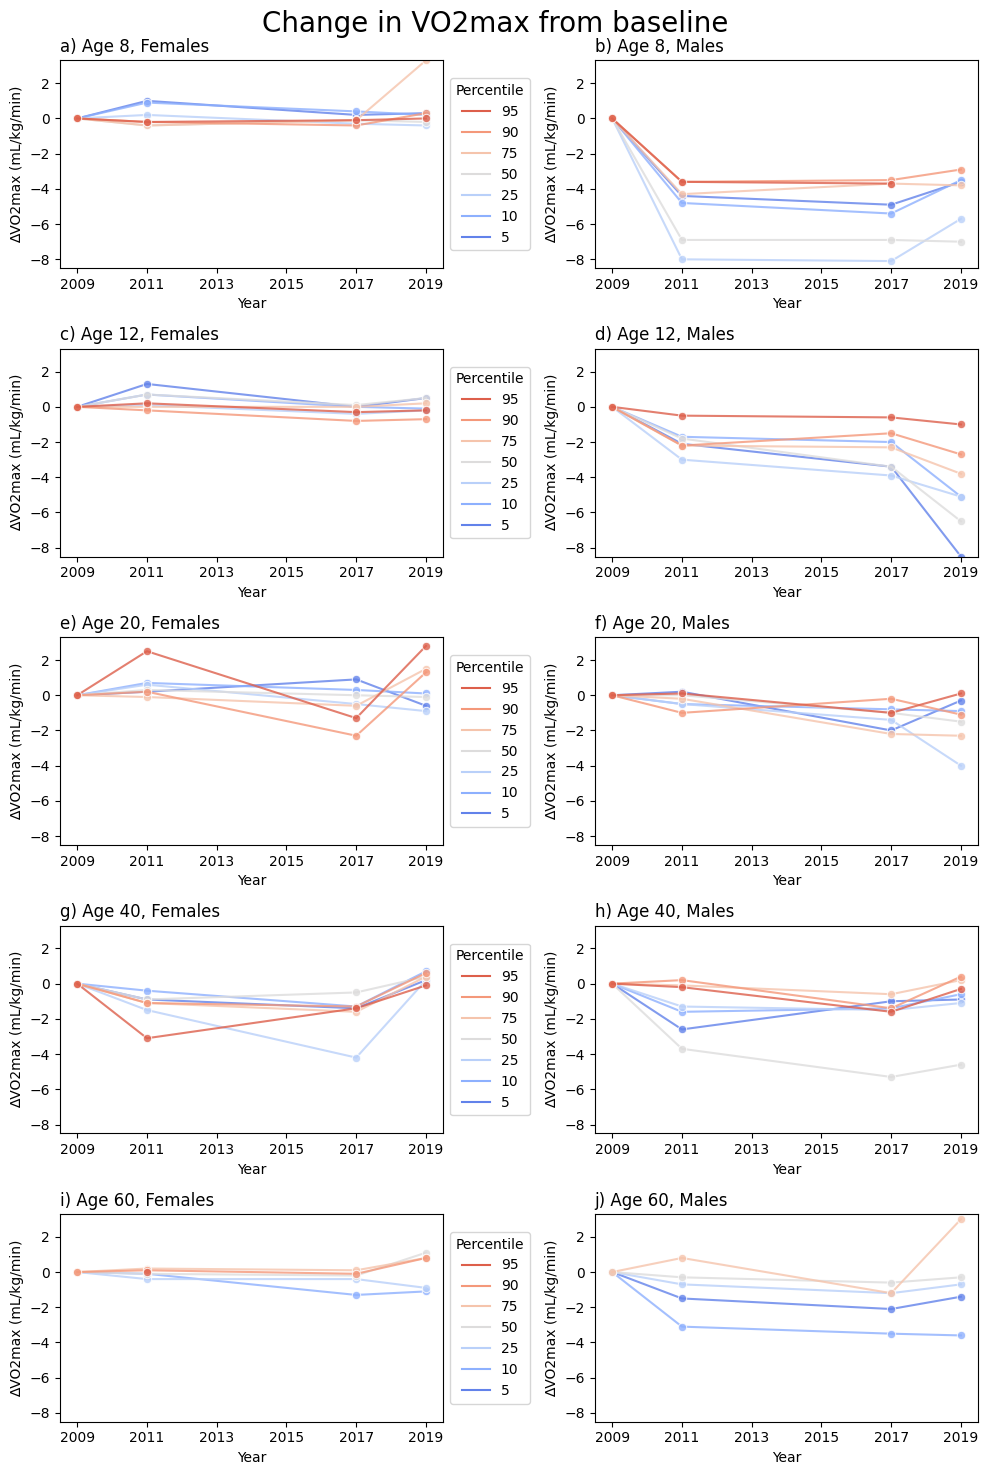

In [87]:

# How does the fitness of a demographic group change over time?
plot_delta_crf_age = lineplots(df_crf[df_crf['Age'] > 6], yaxis_label='∆VO2max (mL/kg/min)', 
    y='Delta_Value', xticks=xticks, title='Change in VO2max from baseline')
# Each line represents a percentile value
    # The fittest seniors got a bit fitter between the 2 most recent time points, but the change within 95% confidence interval
    # People under age 20 with median or with below average fitness are getting less fit over time

plot_delta_crf_age.savefig(r'./crf change vs year by age.png')

#### Lineplots_comparison function

In [100]:
def lineplots_comparison(df, x='Year', columns=['Value', 'Value'], scale_axis=[True,False], match_yaxis=False,
    title=None,
    filter_by='Age', filter_value=12, hue='Percentile', show_legend=True, yaxis_label=None, xticks=None):

    """
    Plot data for the same rows side by side.

    Parameters:
    - df: Dataframe.
    - x (string): Name of variable for x-axis.
    - columns (list): List of column names to plot side by side. 
    - scale_axis (list): Boolean or list of boolean values. If true, scale axes to the min and max for the entire dataframe.
        If more than one value, must match length of columns list.
    - df[df[filter_by] == filter_value]
    - hue: Name of column used for grouping data for hue.
    """

    subplot_label = 'abcdefghijklmnopq'
    if (type(scale_axis) != list):
        scale_axis = [scale_axis for column in columns]
    if type(title) != list:
        title = [title for column in columns]
    if type(yaxis_label) != list:
        yaxis_label = [yaxis_label for column in columns]
    if type(match_yaxis) != list:
        match_yaxis = [match_yaxis for column in columns]
    ncols = len(columns)
    fig, ax = plt.subplots(nrows=1 ,ncols=ncols, figsize=(10,3))
    colors = sns.color_palette("coolwarm", n_colors=len(df[hue].unique()))
    
    ax = ax.flatten()
    ax_index = 0

    for index, column in enumerate(columns):
        if (show_legend==True) & (index==0):
            legend = 'full'
        else:
            legend = False

        sns.lineplot(data=df[df[filter_by] == filter_value], y=column, 
            hue=hue, x=x, marker='o', alpha=0.7, palette=colors,
            legend=legend, 
                ax = ax[ax_index])
        
        # ax[ax_index].set_title(f'{filter_by} {filter_value}')
        if title[index]:
            ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title[index]}', loc='left')

        if (scale_axis[index]==True) & (match_yaxis==True):
            ymin = df[columns].min().min()
            ymax = df[columns].max().max()
            ax[ax_index].set_ylim([ymin,ymax]) 
        elif scale_axis[index]:
            ymin = df[column].min()
            ymax = df[column].max()
            ax[ax_index].set_ylim([ymin,ymax]) 
        elif match_yaxis[index]: 
            ymin = df[df[filter_by] == filter_value][columns].min().min()
            ymax = df[df[filter_by] == filter_value][columns].max().max()
            ax[ax_index].set_ylim([ymin,ymax]) 

        if yaxis_label:
            ax[ax_index].set_ylabel(yaxis_label[ax_index])
        if xticks:
            ax[ax_index].xaxis.set_ticks(xticks)
        if (legend == 'full'):
            # Reverse order of legend entries, then position the legend
            handles, labels = ax[ax_index].get_legend_handles_labels()
            ax[ax_index].legend(handles[::-1], labels[::-1])
            sns.move_legend(ax[ax_index],'center left',bbox_to_anchor=(1, 0.5), title=hue)
        ax_index += 1
        
    plt.tight_layout()
    return fig


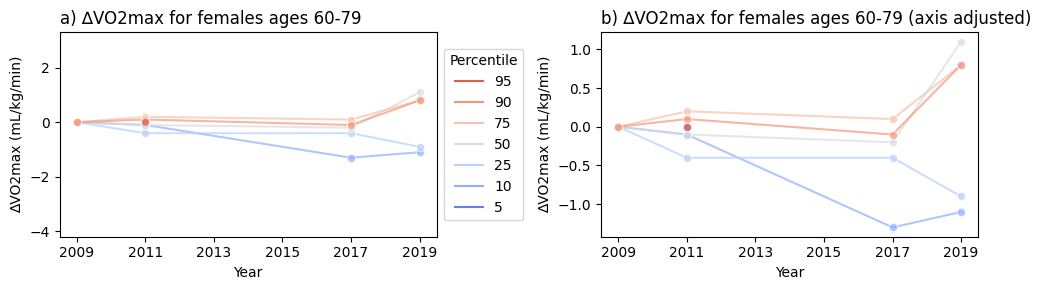

In [108]:
plot_delta_crf_age_female60 = plot_compare_scaling_crf_female60 = lineplots_comparison(df_crf[(df_crf['Sex'] == 'Females')], 
    columns=['Delta_Value', 'Delta_Value'], scale_axis=[True, False], 
    yaxis_label='∆VO2max (mL/kg/min)', title=['∆VO2max for females ages 60-79','∆VO2max for females ages 60-79 (axis adjusted)'], filter_value=60,
    xticks=xticks);
plot_delta_crf_age_female60.savefig(r'./crf change vs year females age 60.png')

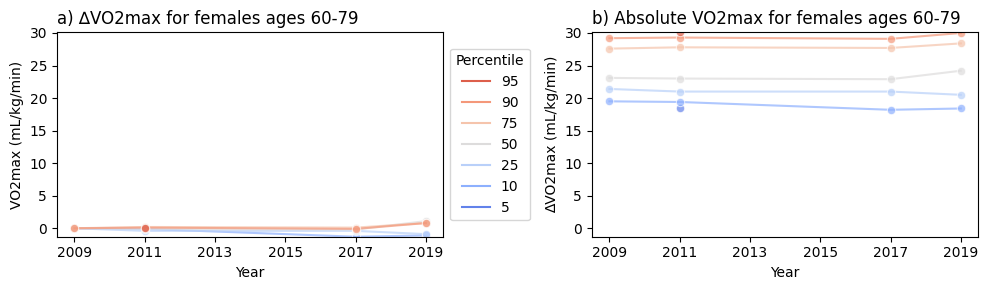

In [109]:

plot_crf_abs_vs_delta_same_yaxis = plot_compare_scaling_crf_female60 = lineplots_comparison(df_crf[(df_crf['Sex'] == 'Females')], 
    columns=['Delta_Value', 'Value'], scale_axis=False, match_yaxis=[True, True],
    yaxis_label=['VO2max (mL/kg/min)','∆VO2max (mL/kg/min)'], title=['∆VO2max for females ages 60-79', 'Absolute VO2max for females ages 60-79'], filter_value=60,
    xticks=xticks);
plot_crf_abs_vs_delta_same_yaxis.savefig(r'./crf absolute and change vs year females same yaxis.png')

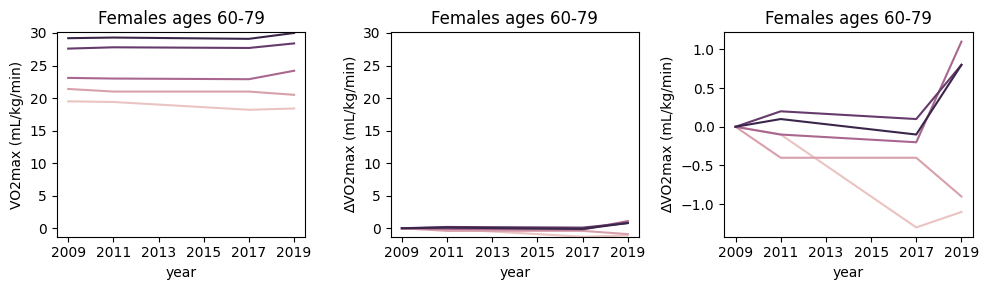

In [ ]:
# 3 subplots comparing value', 'delta_value', 'delta_value' with different y-axis scales
plot_crf_abs_vs_delta_female60 = plot_compare_scaling_crf_female60 = lineplots_comparison(df_crf[(df_crf['sex'] == 'Females')], 
    columns=['value', 'delta_value', 'delta_value'], scale_axis=False, match_yaxis=[True, True, False],
    yaxis_label=['VO2max (mL/kg/min)','∆VO2max (mL/kg/min)','∆VO2max (mL/kg/min)'], title='Females ages 60-79', filter_value=60,
    xticks=xticks);
# plot_crf_abs_vs_delta_female60.savefig(r'./crf absolute and change vs year females age 60.png')

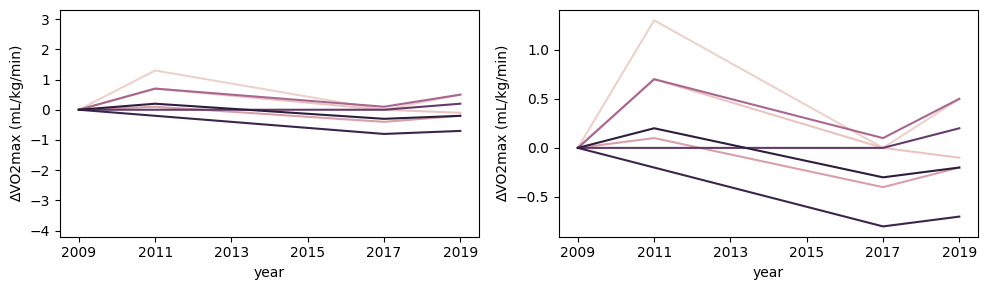

In [143]:
# effect of scaling: delta value for 12 year old female
plot_compare_scaling_crf_female12 = lineplots_comparison(df_crf[(df_crf['sex'] == 'Females')], columns=['delta_value', 'delta_value'], scale_axis=[True, False], 
    yaxis_label='∆VO2max (mL/kg/min)', title=None,
    xticks=xticks);

C:\Users\silvh\AppData\Local\Temp\ipykernel_4440\2350172412.py:30: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(data=df[filter], y=y,
C:\Users\silvh\AppData\Local\Temp\ipykernel_4440\2350172412.py:30: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(data=df[filter], y=y,


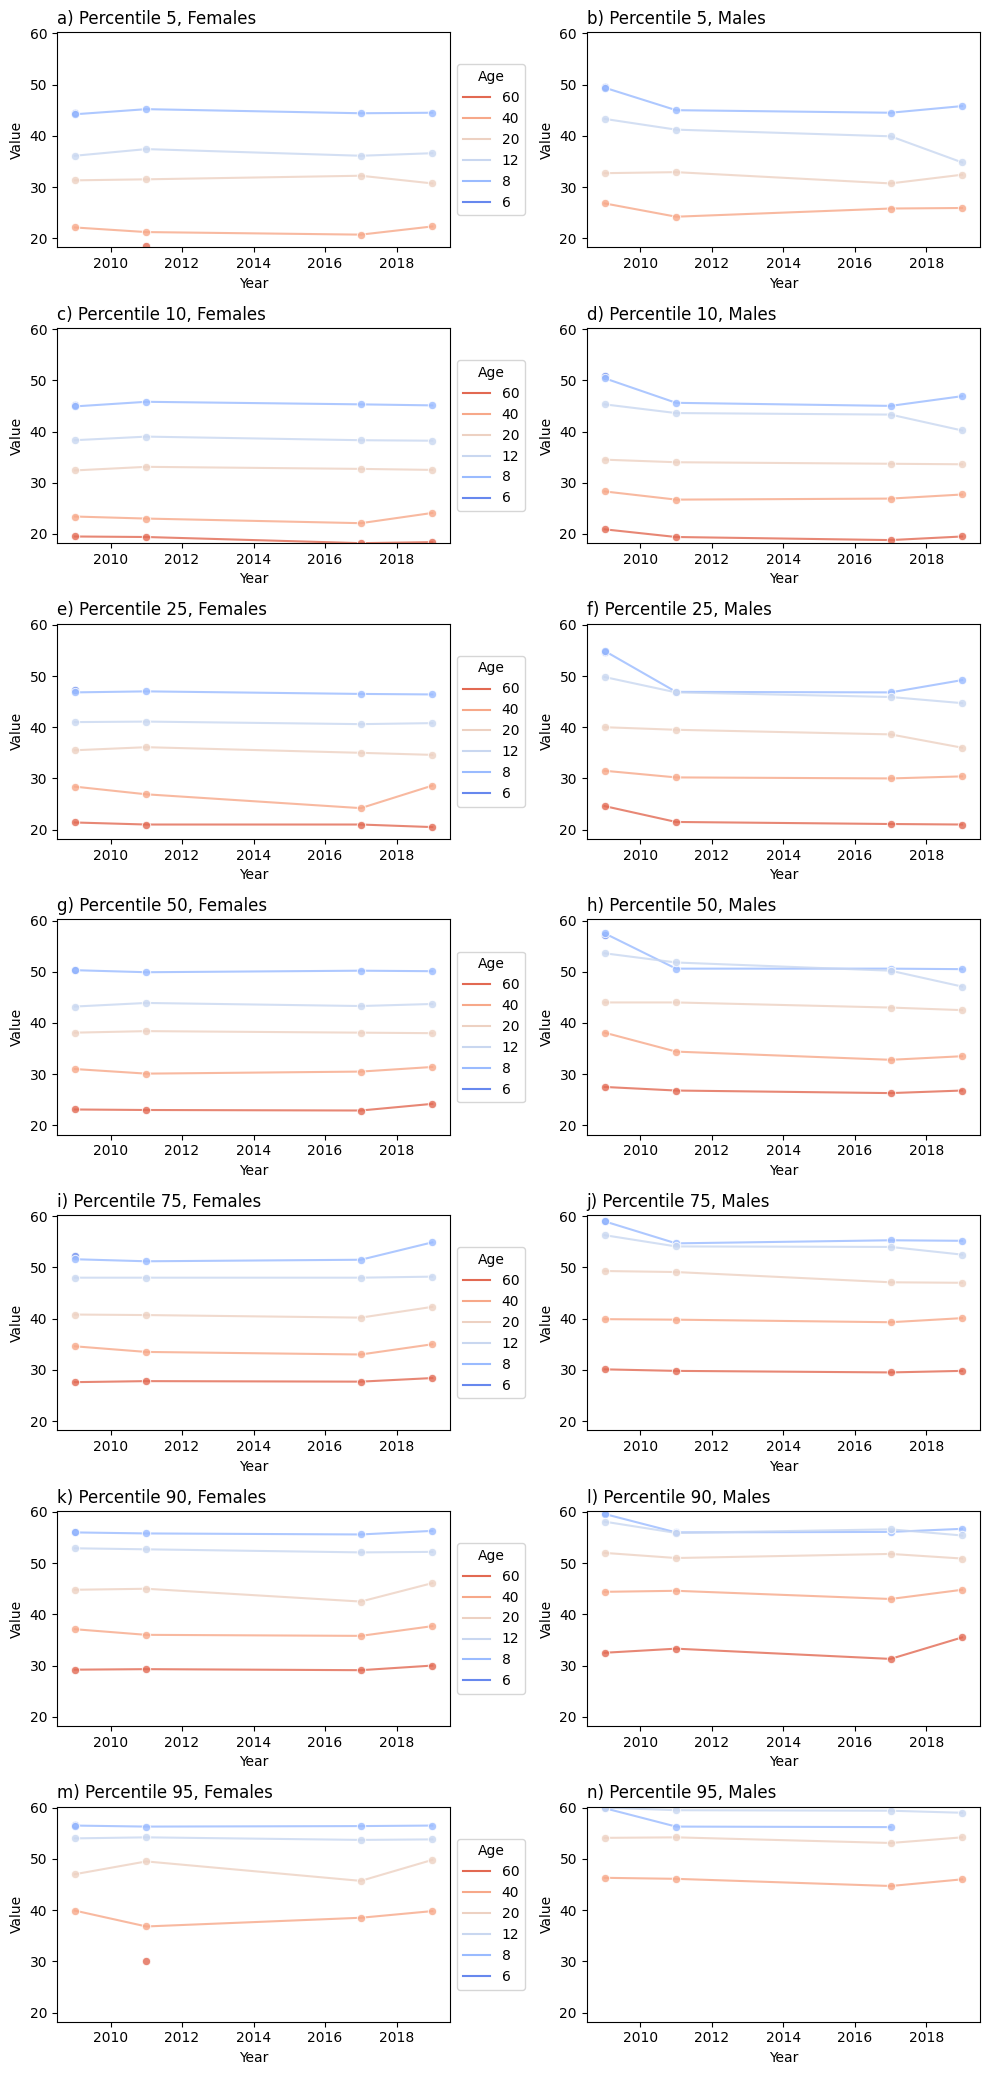

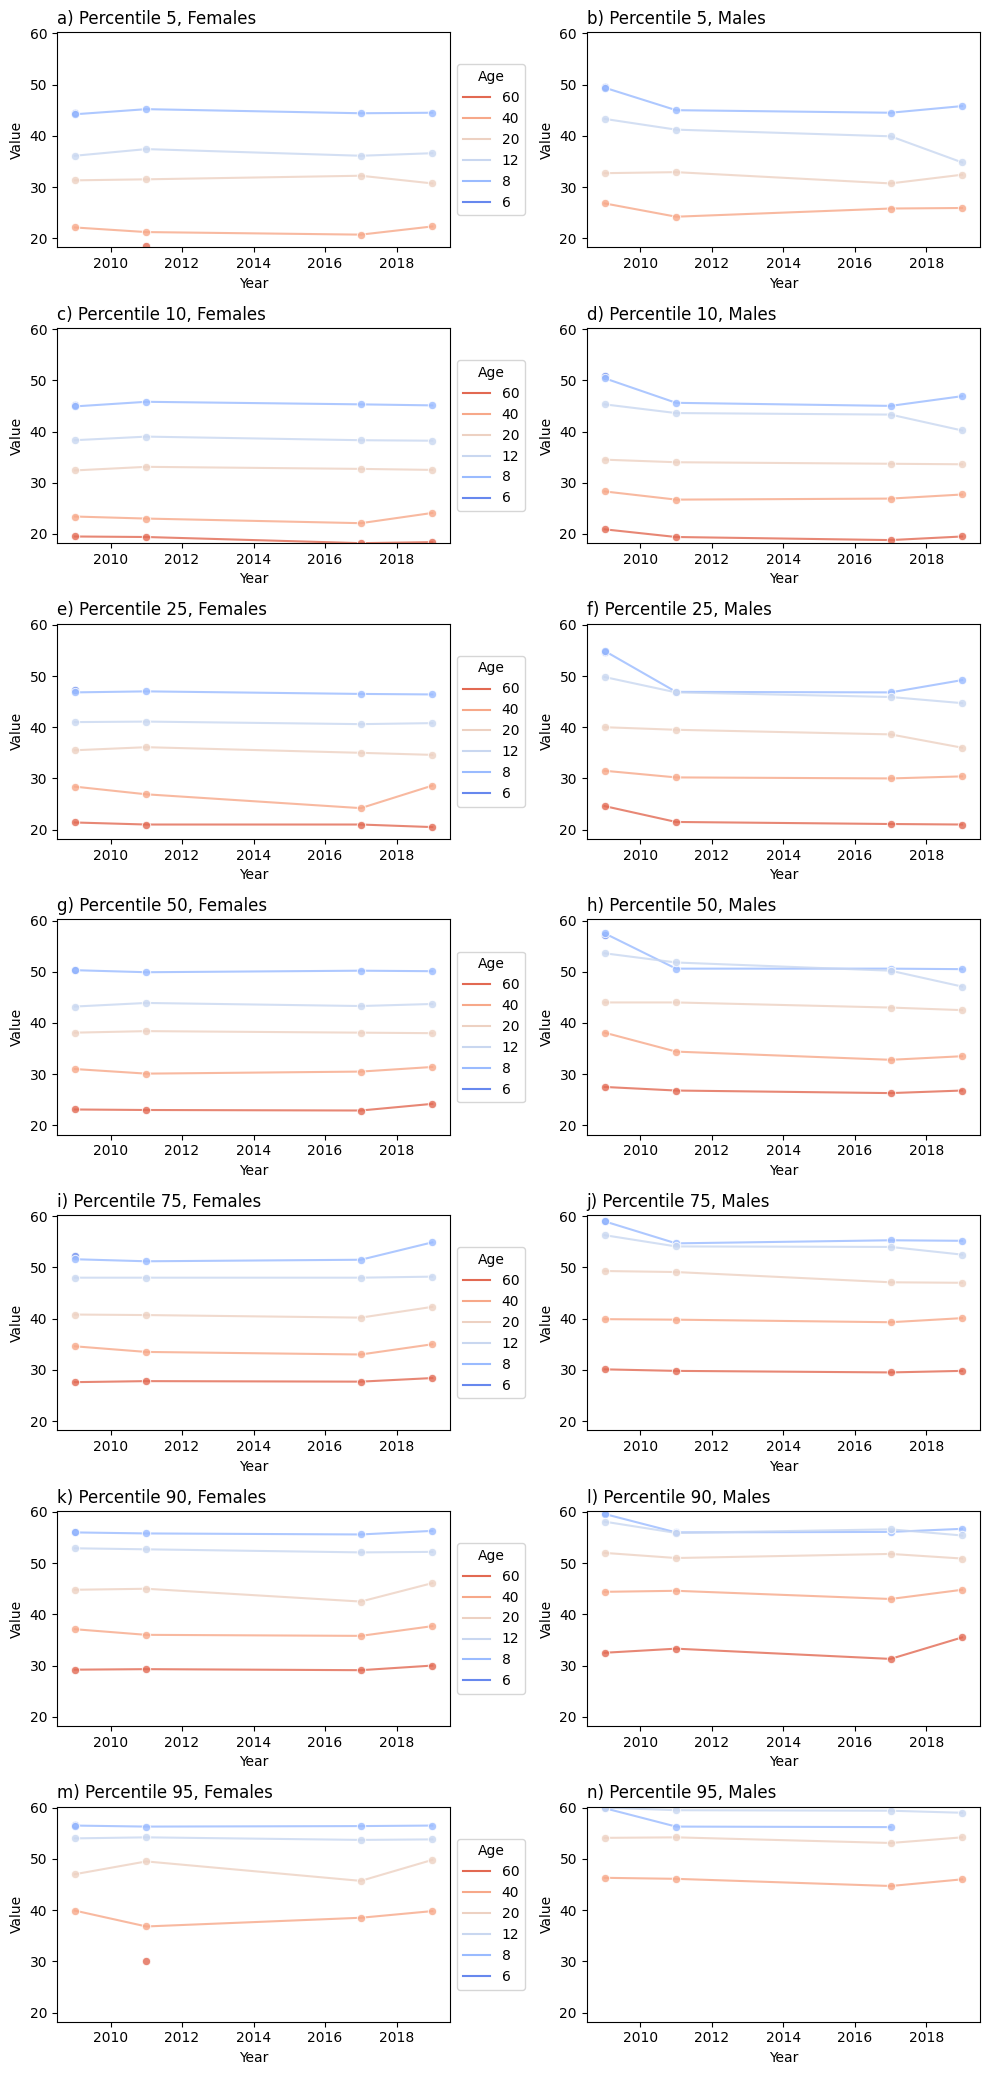

In [110]:

lineplots(df_crf, y='Value', x='Year', column='Sex', row='Percentile', hue='Age')
# Each line represents an age group
    # People under age 20 with median or with below average fitness are getting less fit over time

In [ ]:
df_crf.columns

Index(['year', 'measures', 'sex', 'value', 'age', 'percentile', 'year_t0',
       'value_t0', 'delta_value'],
      dtype='object')

C:\Users\silvh\AppData\Local\Temp\ipykernel_4440\2350172412.py:30: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(data=df[filter], y=y,
C:\Users\silvh\AppData\Local\Temp\ipykernel_4440\2350172412.py:30: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(data=df[filter], y=y,


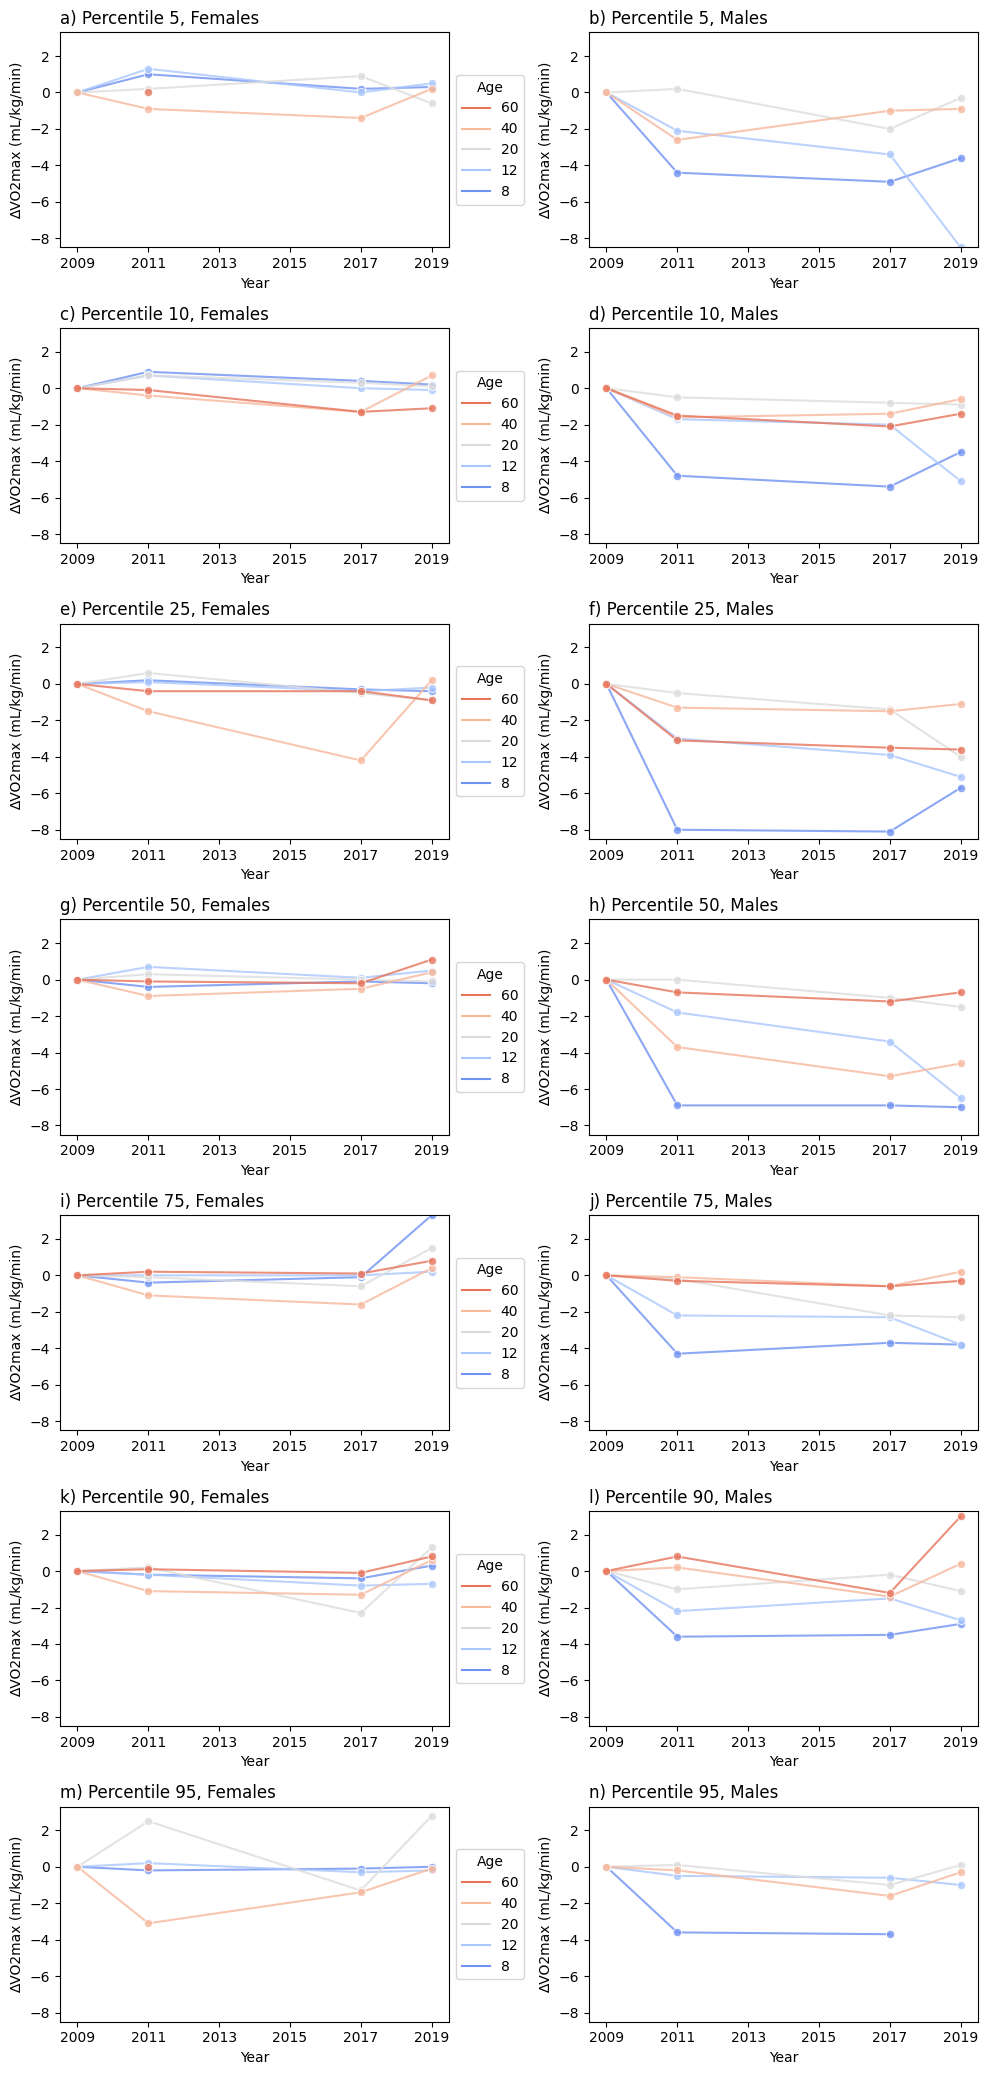

In [112]:
plot_delta_crf_percentile = lineplots(df_crf[(df_crf['Age'] > 6)],# & (df_crf['percentile'] != 5) & (df_crf['percentile'] != 95)], 
    y='Delta_Value', x='Year', column='Sex', row='Percentile', hue='Age', yaxis_label='∆VO2max (mL/kg/min)', 
    xticks=xticks);
# Each line represents an age group
plot_delta_crf_percentile.savefig(r'./Change in VO2max from baseline by percentile.png')


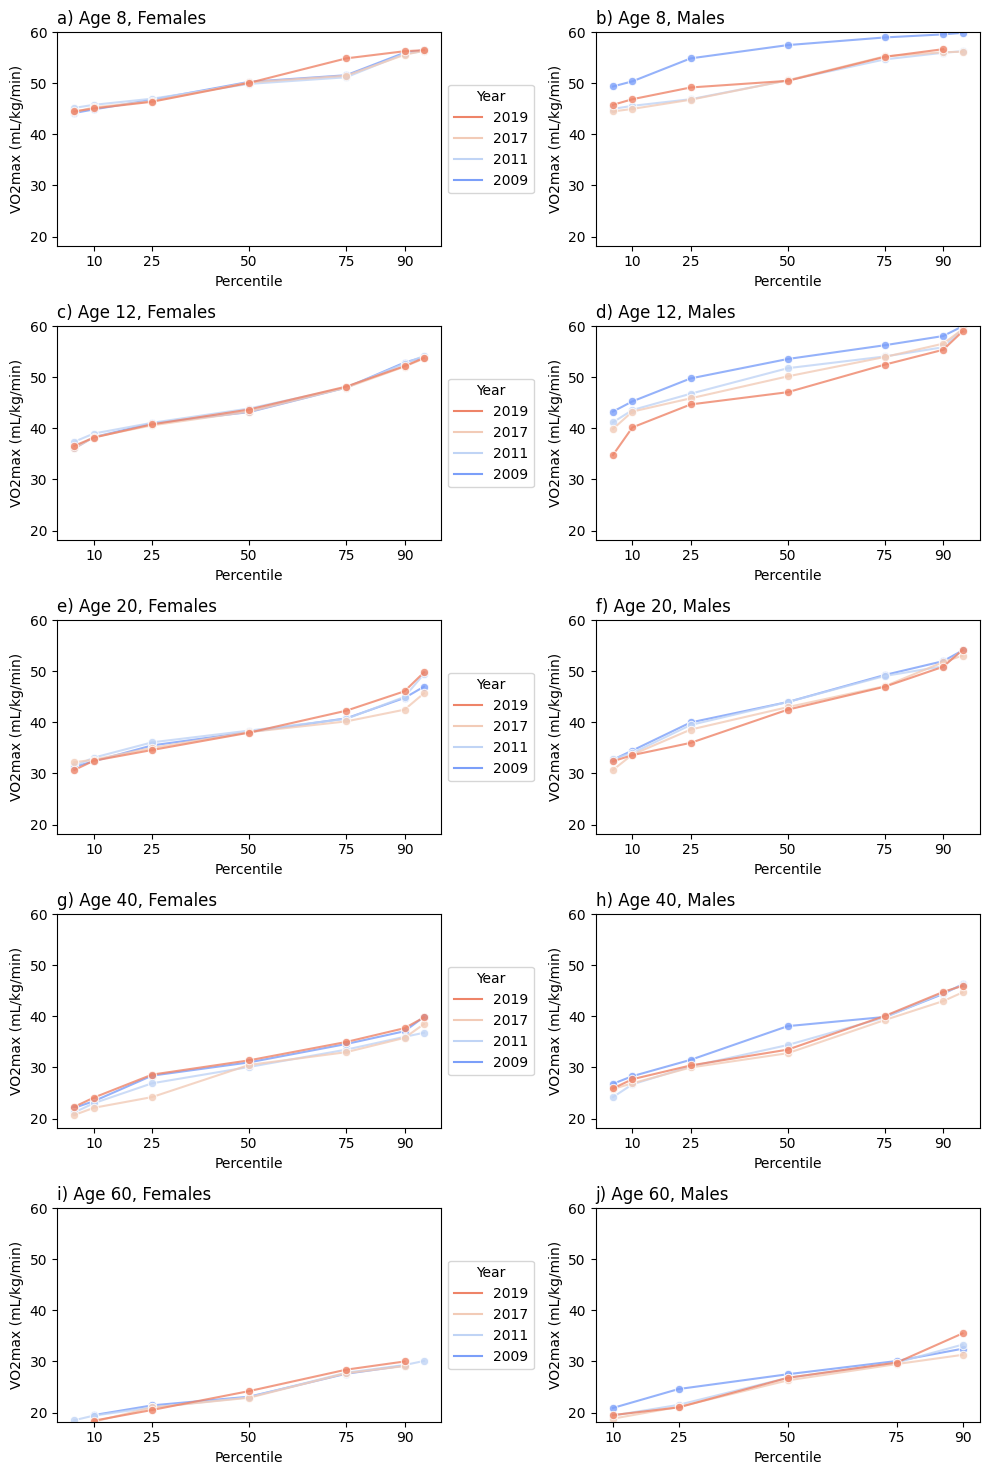

In [115]:
percentile = sorted(df_crf['Percentile'].unique()[1:-1])
plot_crf_by_percentile_age = lineplots(df_crf[df_crf['Age'] > 6], y='Value', x='Percentile', column='Sex', row='Age', hue='Year',
    yaxis_label='VO2max (mL/kg/min)', xticks=percentile);
plot_crf_by_percentile_age.savefig('crf vs percentile group by age.png')
# Lines are pretty much the same from year to year except for in males <20

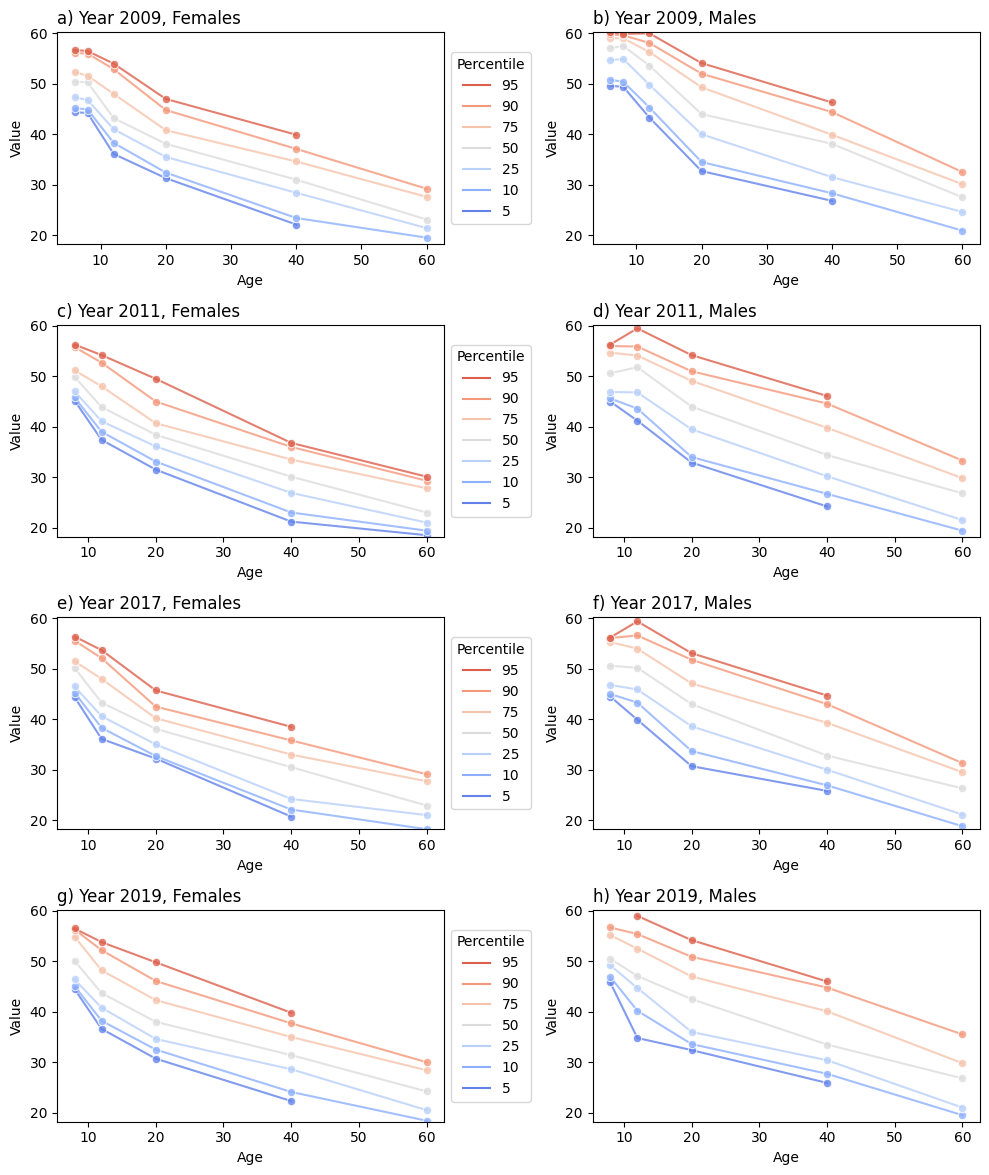

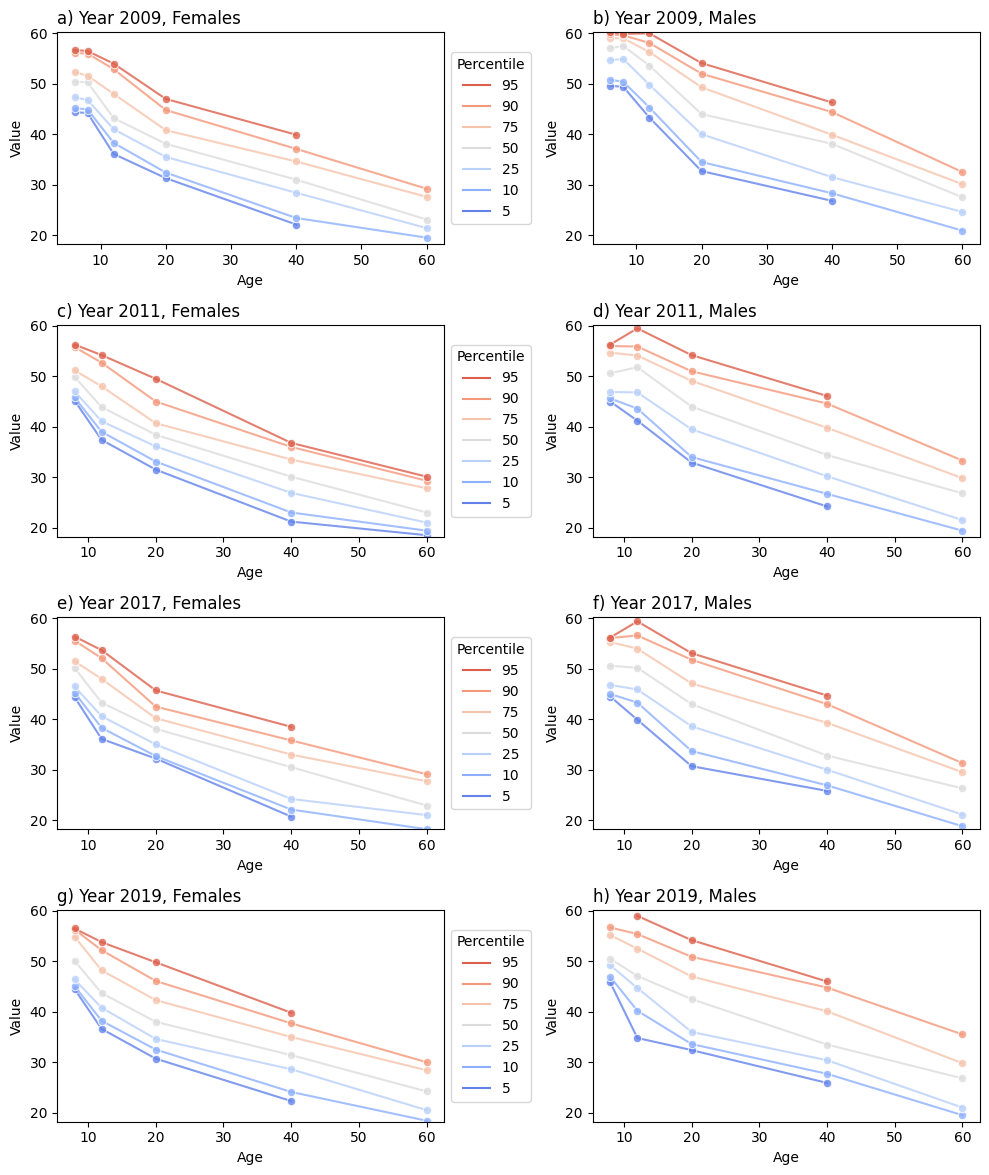

In [117]:
# how does fitness vary with age?
lineplots(df_crf, y='Value', x='Age', column='Sex', row='Year', hue='Percentile')
# Older people can have higher fitness

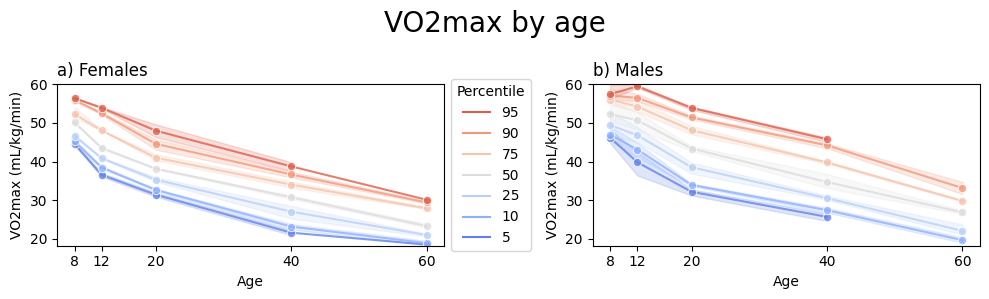

In [120]:
# how does fitness vary with age?
ages = sorted(df_crf[df_crf['Age'] >= 8]['Age'].unique())
plot_crf_vs_age = lineplots(df_crf[df_crf['Age'] >= 8], y='Value', x='Age', column='Sex', row='Measures', hue='Percentile',
    yaxis_label='VO2max (mL/kg/min)', title='VO2max by age',show_legend=True, xticks=ages)
plot_crf_vs_age.savefig(r'./crf vs age.png')

### Grip strength

In [259]:
measure = 'Total grip strength'
grip = df2['measures'] == measure
df_grip = df2[grip]
df_grip

,year,measures,sex,value,age,percentile,year_t0,value_t0,delta_value
150,2009,Total grip strength,Males,12.0,6,5,2009.0,12.0,0.0
151,2009,Total grip strength,Males,15.0,6,10,2009.0,15.0,0.0
152,2009,Total grip strength,Males,20.0,6,25,2009.0,20.0,0.0
153,2009,Total grip strength,Males,27.0,6,50,2009.0,27.0,0.0
154,2009,Total grip strength,Males,33.0,6,75,2009.0,33.0,0.0
...,...,...,...,...,...,...,...,...,...
972,2019,Total grip strength,Females,40.0,60,25,2009.0,38.0,2.0
973,2019,Total grip strength,Females,47.0,60,50,2009.0,45.0,2.0
974,2019,Total grip strength,Females,53.0,60,75,2009.0,52.0,1.0
975,2019,Total grip strength,Females,58.0,60,90,2009.0,59.0,-1.0


<AxesSubplot: xlabel='year', ylabel='value'>

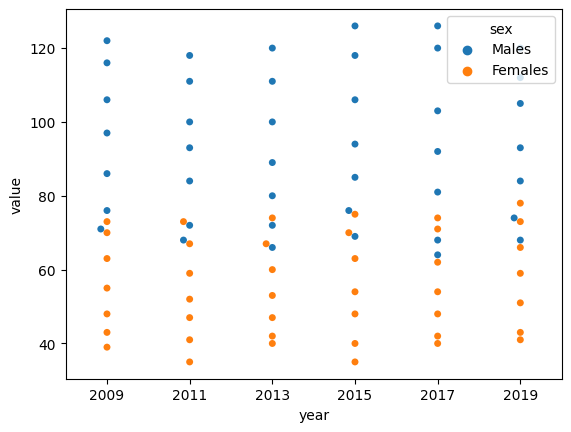

In [66]:
# swarm plot
filter = df_grip['age'] == 20
sns.swarmplot(data=df_grip[filter], y='value', hue='sex', x='year')

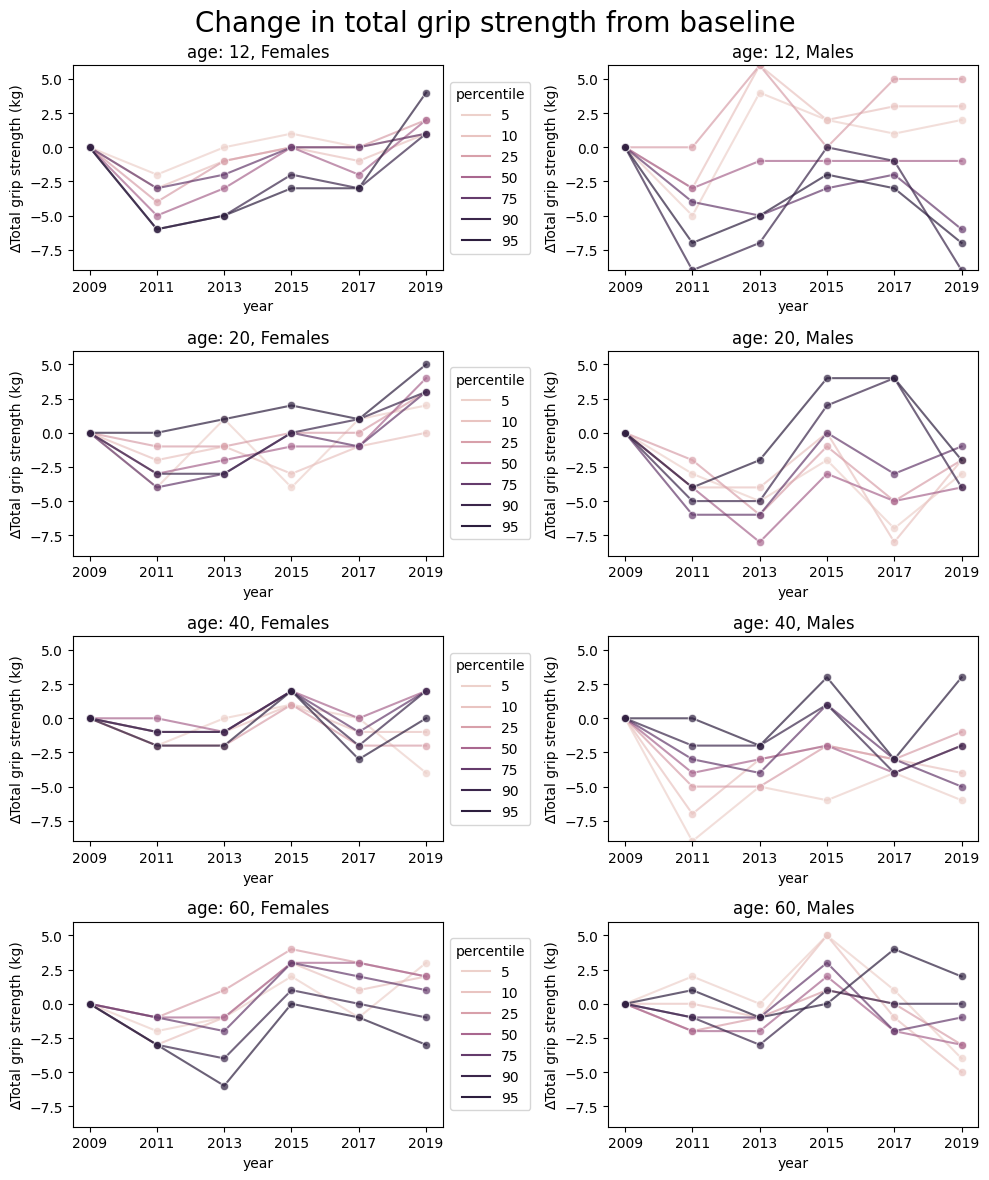

In [280]:
# How does the fitness of a demographic group change over time?
plot_grip_vs_year_age = lineplots(df_grip[df_grip['age'] > 6], y='delta_value', xticks=xticks,
    title='Change in total grip strength from baseline', yaxis_label='∆Total grip strength (kg)')
plot_grip_vs_year_age.savefig(r'./grip change vs. year by age.png')
# it seems that females under age 40 have been increasing their grip strength since 2011 (yay!).

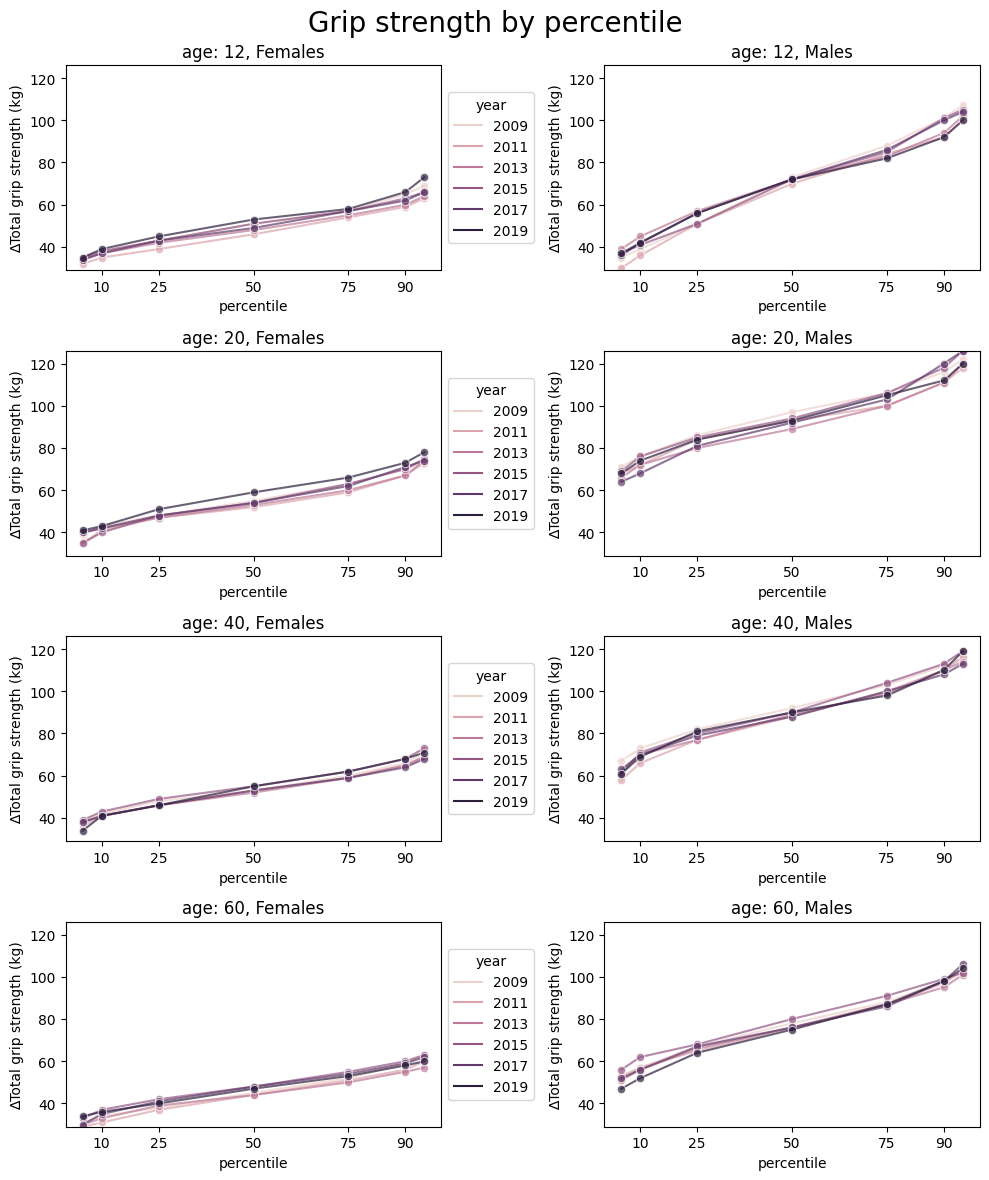

In [289]:
# How do values change with percentile?
plot_grip_vs_percentile = lineplots(df_grip[df_grip['age'] > 6], title='Grip strength by percentile', 
    yaxis_label='∆Total grip strength (kg)',
    y='value', x='percentile', column='sex', row='age', hue='year', xticks=percentile);

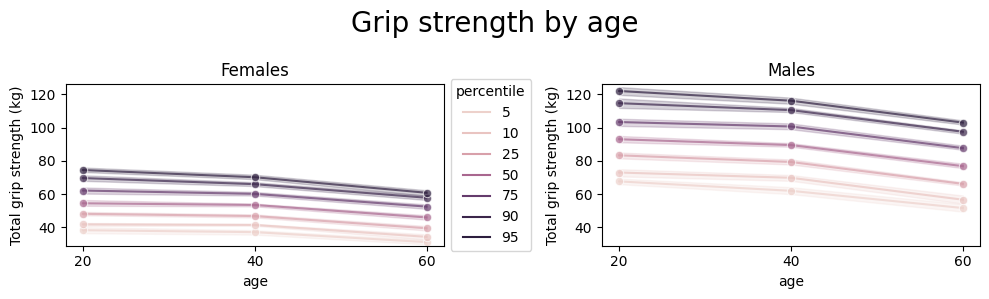

In [309]:
# how does fitness vary with age?
adult_ages = sorted(df_crf[df_crf['age'] > 12]['age'].unique())
plot_grip_vs_age = lineplots(df_grip[df_grip['age'] > 12], y='value', x='age', column='sex', row='measures', hue='percentile',
    title='Grip strength by age', xticks=adult_ages,
    show_legend=True, yaxis_label='Total grip strength (kg)')
plot_grip_vs_age.savefig(r'grip vs age.png')

In [ ]:
groupby = [
    'REF_DATE',
    'Measures',
    'Sex',
    'Age group',
    'Characteristics',
    'VALUE',
]

In [ ]:
df_grip.groupby(['REF_DATE','Age group','Sex']).agg({'VALUE': 'count'}).head(30)

VALUE
REF_DATE Age group     Sex              
2009     Ages 12 to 19 Both sexes     24
                       Females        24
                       Males          24
         Ages 20 to 39 Both sexes     24
                       Females        24
                       Males          24
         Ages 40 to 59 Both sexes     24
                       Females        24
                       Males          24
         Ages 6 to 11  Both sexes     24
                       Females        24
                       Males          24
         Ages 6 to 69  Both sexes     24
                       Females        24
                       Males          24
         Ages 6 to 79  Both sexes      0
                       Females         0
                       Males           0
         Ages 60 to 69 Both sexes     24
                       Females        18
                       Males          18
         Ages 60 to 79 Both sexes      0
                       Females         0
                       Males           0
         Ages 8 to 11  Both sexes     24
                       Females        24
                       Males          24
         Ages 8 to 69  Both sexes     24
                       Females        24
                       Males          24

In [ ]:
year = 2019
filter = (df_grip['REF_DATE'] == year) & (df_grip['Statistics'] == '50th Percentile')
df_grip[filter].sort_values('Sex').head(30)

,REF_DATE,Measures,Sex,Age group,Statistics,Characteristics,VALUE
12828,2019,Predicted maximal oxygen consumption,Both sexes,Ages 8 to 69,50th Percentile,Estimate,37.1
12950,2019,Predicted maximal oxygen consumption,Both sexes,Ages 60 to 69,50th Percentile,"High 95% confidence interval, estimate",27.6
12948,2019,Predicted maximal oxygen consumption,Both sexes,Ages 60 to 69,50th Percentile,Estimate,25.9
12926,2019,Predicted maximal oxygen consumption,Both sexes,Ages 40 to 59,50th Percentile,"High 95% confidence interval, estimate",33.6
12925,2019,Predicted maximal oxygen consumption,Both sexes,Ages 40 to 59,50th Percentile,"Low 95% confidence interval, estimate",31.3
12924,2019,Predicted maximal oxygen consumption,Both sexes,Ages 40 to 59,50th Percentile,Estimate,32.4
12902,2019,Predicted maximal oxygen consumption,Both sexes,Ages 20 to 39,50th Percentile,"High 95% confidence interval, estimate",41.6
12901,2019,Predicted maximal oxygen consumption,Both sexes,Ages 20 to 39,50th Percentile,"Low 95% confidence interval, estimate",38.4
12900,2019,Predicted maximal oxygen consumption,Both sexes,Ages 20 to 39,50th Percentile,Estimate,40.0
12949,2019,Predicted maximal oxygen consumption,Both sexes,Ages 60 to 69,50th Percentile,"Low 95% confidence interval, estimate",24.3


# *End of Page*